In [64]:
import os
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib widget
import geopy.distance

In [52]:
cwd = os.getcwd()

In [53]:
"""
count=0
for file in mine_files:
    df = np.genfromtxt(file,delimiter=',')
    if(df.shape[0] ==2):
        count+=1
        if count == 1:
            mine_detect_lon = df[0]
            mine_detect_lat = df[1]
        else:
            x=df[0]
            y=df[1]
            mine_detect_lon = np.concatenate((mine_detect_lon,x[...,np.newaxis] ),axis=0)
            mine_detect_lat = np.concatenate((mine_detect_lat,y[...,np.newaxis] ),axis=0)
        
    elif(df.shape[0]>2):
        count+=1
        if count == 1:
            mine_detect_lon = df[:,0]
            mine_detect_lat = df[:,1]
        else:
            mine_detect_lon = np.concatenate((mine_detect_lon,df[:,0] ),axis=0)
            mine_detect_lat = np.concatenate((mine_detect_lat,df[:,1] ),axis=0)
outname = os.path.join(cwd,'Results_with_B56SdDev_WithNdiffofB56StDevBand/Combined.txt')           
np.savetxt(outname,np.array([mine_detect_lon[:],mine_detect_lat[:]]).T,delimiter=',',fmt='%.6f')
"""

"\ncount=0\nfor file in mine_files:\n    df = np.genfromtxt(file,delimiter=',')\n    if(df.shape[0] ==2):\n        count+=1\n        if count == 1:\n            mine_detect_lon = df[0]\n            mine_detect_lat = df[1]\n        else:\n            x=df[0]\n            y=df[1]\n            mine_detect_lon = np.concatenate((mine_detect_lon,x[...,np.newaxis] ),axis=0)\n            mine_detect_lat = np.concatenate((mine_detect_lat,y[...,np.newaxis] ),axis=0)\n        \n    elif(df.shape[0]>2):\n        count+=1\n        if count == 1:\n            mine_detect_lon = df[:,0]\n            mine_detect_lat = df[:,1]\n        else:\n            mine_detect_lon = np.concatenate((mine_detect_lon,df[:,0] ),axis=0)\n            mine_detect_lat = np.concatenate((mine_detect_lat,df[:,1] ),axis=0)\noutname = os.path.join(cwd,'Results_with_B56SdDev_WithNdiffofB56StDevBand/Combined.txt')           \nnp.savetxt(outname,np.array([mine_detect_lon[:],mine_detect_lat[:]]).T,delimiter=',',fmt='%.6f')\n"

In [47]:
ipis_file = 'cod_mines_curated_all_opendata_p_ipis.csv'
ipis_df = pd.read_csv(ipis_file)

ipis_lon = ipis_df['longitude'].values
ipis_lat = ipis_df['latitude'].values
onsite_visit = ipis_df['visit_onsite'].values
ipis_year = ipis_df['visit_date'].values
worker_count = ipis_df['workers_numb'].values

In [34]:
#true_indicator = sum(d, [])
#print(len(true_indicator))

"""
true_indicator = np.empty(len(mine_detect_lon)) ; true_indicator[:] = np.nan
for i in tqdm(range(9)):
    left_bound = mine_detect_lon[i] - pix_sep * pixel_res * meter
    right_bound = mine_detect_lon[i] + pix_sep * pixel_res * meter
    top_bound = mine_detect_lat[i] + pix_sep * pixel_res * meter
    bottom_bound = mine_detect_lat[i] - pix_sep * pixel_res * meter    
    
    idx = np.logical_and(mine_detect_lon<right_bound,mine_detect_lon>left_bound)
    idy = np.logical_and(mine_detect_lat<top_bound,mine_detect_lat>bottom_bound)
    idf = np.logical_and(idx==True,idy==True)
    pts = np.sum(idf)
    box_size = pix_sep**2
    if(pts >= box_size):
        true_indicator[idf] = 1
print(np.sum(np.isfinite(true_indicator)))
"""

100%|██████████| 9/9 [00:00<00:00, 414.42it/s]

222


In [15]:
idf = np.where(true_indicator==1)[0]
print(idf)

[     8      9     10 ... 263662 263663 263664]


In [72]:
df = np.genfromtxt('Results_no_B56SdDev_WithNdiffofB56Native/Combined.txt',delimiter=',')
dg400 = np.genfromtxt('Results_no_B56SdDev_WithNdiffofB56Native/Clustered_400m.txt',delimiter=',')
dg240 = np.genfromtxt('Results_no_B56SdDev_WithNdiffofB56Native/Clustered_240m.txt',delimiter=',')

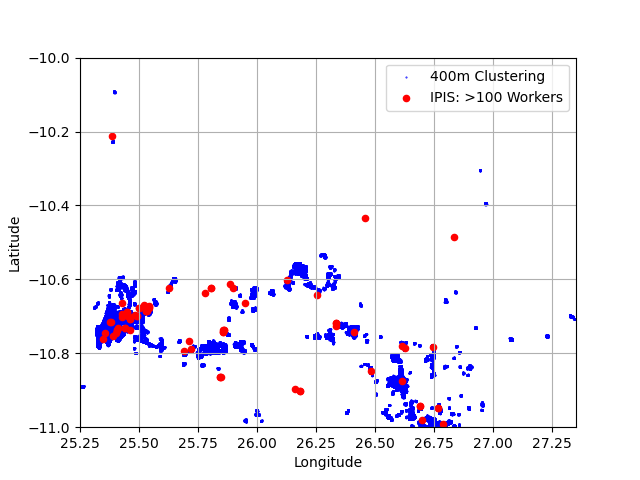

In [62]:
fig,ax=plt.subplots(1,2)
#plt.scatter(df[:,0],df[:,1],s=0.2,c='green')
plt.scatter(dg400[:,0],dg400[:,1],s=0.2,c='blue',label='400m Clustering')
plt.scatter(dg240[:,0],dg240[:,1],s=0.2,c='blue',label='400m Clustering')
plt.scatter(ipis_lon[worker_count>50],ipis_lat[worker_count>50],label='IPIS: >50 Workers',color='red',s=20)
plt.xlim([25.25,27.35])
plt.ylim([-11,-10])
plt.grid(True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

#plt.close('all')

In [ ]:
from simplekml import (Kml, AltitudeMode,Color)
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from palettable import colorbrewer
import numpy.ma as ma
import matplotlib as mpl
mpl.cm.get_cmap
import matplotlib.cm as cm
from sys import exit
from tqdm import tqdm

def make_kml(lon,lat,alt,colorrange,outname):
    kml = Kml()
    npnts = len(lon)
    for i in tqdm(range(npnts)):
        #pnt = kml.newpoint(coords=[(lon[i],lat[i],alt[i])],gxaltitudemode='relativeToSeaFloor')
        pnt = kml.newpoint(coords=[(lon[i],lat[i],alt[i])],altitudemode='clampToGround')
        #pnt = kml.newpoint(coords=[(lon[i],lat[i],alt[i])],altitudemode='relativetoground')
        #pnt.style.labelstyle.color = Color.rgb(int(colorrange[i]),0,0,255)
        pnt.style.iconstyle.color = Color.rgb(int(colorrange[i]),0,0,int(colorrange[i]))
        pnt.style.iconstyle.icon.href = 'http://earth.google.com/images/kml-icons/track-directional/track-none.png'
    kml.save(outname)

In [ ]:
lon = mine_detect_lon[idf]
lat = mine_detect_lat[idf]

color = 255*np.ones(len(lon))
alt=np.zeros(len(color))
make_kml(lon,lat,alt,color,'Mines_Test.kml')